## 나이브 베이즈

### GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_norm = GaussianNB().fit(X, y)

model_norm.classes_
model_norm.class_count_
model_norm.class_prior_
model_norm.theta_[0], model_norm.sigma_[0]
model_norm.theta_[1], model_norm.sigma_[1]

x_new = (0,0)
model_norm.predict_proba([x_new])

##### 붓꽃 데이터 테스트

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB().fit(X,y)

model_nb.classes_, model_nb.class_prior_

(array([0, 1, 2]), array([0.33333333, 0.33333333, 0.33333333]))

In [8]:
model_nb.theta_[0], model_nb.sigma_[0]

(array([5.006, 3.428, 1.462, 0.246]),
 array([0.121764, 0.140816, 0.029556, 0.010884]))

In [9]:
model_nb.theta_[1], model_nb.sigma_[1]

(array([5.936, 2.77 , 4.26 , 1.326]),
 array([0.261104, 0.0965  , 0.2164  , 0.038324]))

In [10]:
model_nb.theta_[2], model_nb.sigma_[2]

(array([6.588, 2.974, 5.552, 2.026]),
 array([0.396256, 0.101924, 0.298496, 0.073924]))

In [11]:
from sklearn.metrics import classification_report
y_pred = model_nb.predict(X)
target_names = ['class0', 'class1', 'class2']
print(classification_report(y, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      class0       1.00      1.00      1.00        50
      class1       0.94      0.94      0.94        50
      class2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



### 베르누이

In [12]:
X = np.array([
    # 동전 4번
    # [2, 4, 3, 1] / 4
    [0, 1, 1, 0],
    [1, 1, 1, 1],
    [1, 1, 1, 0],
    [0, 1, 0, 0],
    # 동전 6번
    # [2, 3, 5, 3] / 6
    [0, 0, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 1, 0],
    [1, 0, 1, 1],
    [0, 1, 1, 0]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [50]:
from sklearn.naive_bayes import BernoulliNB
model_bern = BernoulliNB().fit(X, y)

In [14]:
model_bern.classes_

array([0, 1])

In [15]:
model_bern.class_count_

array([4., 6.])

In [18]:
np.exp(model_bern.class_log_prior_)

array([0.4, 0.6])

In [20]:
    # 동전 4번
    # [2, 4, 3, 1] / 4
    # 동전 6번
    # [2, 3, 5, 3] / 6
fc = model_bern.feature_count_
fc

array([[2., 4., 3., 1.],
       [2., 3., 5., 3.]])

In [22]:
# 스무딩한 세트 수
model_bern.alpha

1.0

In [23]:
# 스무딩이 반영된 평균이 들어있음
theta = np.exp(model_bern.feature_log_prob_)
theta

array([[0.5       , 0.83333333, 0.66666667, 0.33333333],
       [0.375     , 0.5       , 0.75      , 0.5       ]])

In [28]:
#메일이 들어왔는데 스팸메일일 확률
x_new = np.array([1,1,0,0])
model_bern.predict_proba([x_new])

array([[0.72480181, 0.27519819]])

### Binarizer test

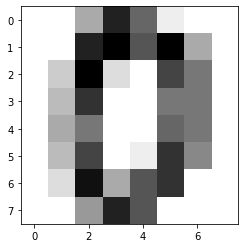

In [79]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
plt.imshow(digits.images[0,:,:], cmap=plt.cm.binary)
plt.show()

In [65]:
from sklearn.preprocessing import Binarizer
X1 = Binarizer(7).fit_transform(X)
X1.shape

/Users/ryeol/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass threshold=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


(1797, 64)

In [53]:
X1[0, :]

array([0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.])

In [54]:
model_Bi = BernoulliNB().fit(X1, y)

In [55]:
model_Bi.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [56]:
model_Bi.class_log_prior_

array([-2.31209034, -2.2898672 , -2.31772415, -2.28438773, -2.29537686,
       -2.2898672 , -2.29537686, -2.30648808, -2.33481859, -2.30091704])

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y, model_Bi.predict(X1)))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       178
           1       0.80      0.80      0.80       182
           2       0.91      0.90      0.91       177
           3       0.93      0.85      0.89       183
           4       0.96      0.94      0.95       181
           5       0.92      0.88      0.90       182
           6       0.97      0.96      0.97       181
           7       0.91      0.99      0.95       179
           8       0.80      0.82      0.81       174
           9       0.80      0.87      0.83       180

    accuracy                           0.90      1797
   macro avg       0.90      0.90      0.90      1797
weighted avg       0.90      0.90      0.90      1797



In [84]:
img_data = np.exp(model_Bi.feature_log_prob_)

In [86]:
img_data[0]

array([0.00555556, 0.00555556, 0.15      , 0.97777778, 0.86111111,
       0.11666667, 0.00555556, 0.00555556, 0.00555556, 0.01666667,
       0.90555556, 0.93333333, 0.82222222, 0.83888889, 0.02777778,
       0.00555556, 0.00555556, 0.1       , 0.97222222, 0.32777778,
       0.08888889, 0.92222222, 0.11111111, 0.00555556, 0.00555556,
       0.23333333, 0.93333333, 0.09444444, 0.00555556, 0.67222222,
       0.43888889, 0.00555556, 0.00555556, 0.31111111, 0.91111111,
       0.03333333, 0.00555556, 0.61666667, 0.61666667, 0.00555556,
       0.00555556, 0.05555556, 0.97222222, 0.07777778, 0.06111111,
       0.84444444, 0.36111111, 0.00555556, 0.00555556, 0.00555556,
       0.94444444, 0.71666667, 0.72777778, 0.92222222, 0.09444444,
       0.00555556, 0.00555556, 0.00555556, 0.13333333, 0.98888889,
       0.94444444, 0.3       , 0.00555556, 0.00555556])

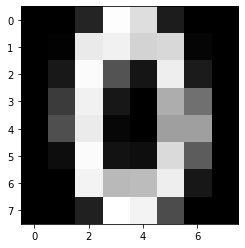

In [87]:
aa = np.reshape(img_data[0], (8,8))
plt.imshow(aa, cmap='gray')
plt.show()

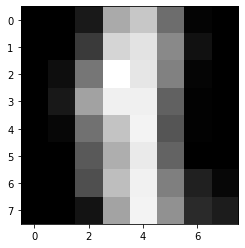

In [99]:
bb = np.reshape(img_data[1], (8,8))
plt.imshow(bb, cmap='gray')
plt.show()

### Multinominal (다항)

In [100]:
X = np.array([
    [3, 4, 1, 2],
    [3, 5, 1, 1],
    [3, 3, 0, 4],
    [3, 4, 1, 2],
    [1, 2, 1, 4],
    [0, 0, 5, 3],
    [1, 2, 4, 1],
    [1, 1, 4, 2],
    [0, 1, 2, 5],
    [2, 1, 2, 3]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [101]:
from sklearn.naive_bayes import MultinomialNB
model_mult = MultinomialNB().fit(X, y)

In [103]:
model_mult.classes_

array([0, 1])

In [104]:
model_mult.class_count_

array([4., 6.])

In [106]:
np.exp(model_mult.class_log_prior_)

array([0.4, 0.6])

In [107]:
fc = model_mult.feature_count_
fc

array([[12., 16.,  3.,  9.],
       [ 5.,  7., 18., 18.]])

In [109]:
model_mult.alpha

1.0

In [110]:
x_new = np.array([10,10,10,10])
model_mult.predict_proba([x_new])

array([[0.38848858, 0.61151142]])

In [114]:
#각 확률
theta = np.exp(model_mult.feature_log_prob_)
theta

array([[0.29545455, 0.38636364, 0.09090909, 0.22727273],
       [0.11538462, 0.15384615, 0.36538462, 0.36538462]])

In [128]:
# 각 확률 ** 나온 횟수. 클래스별로 곱해주고, 클래스별 가중
p = (theta ** x_new).prod(axis=1)*np.exp(model_mult.class_log_prior_)
p / p.sum()

array([0.38848858, 0.61151142])